Implement K-Means clustering on the Iris dataset. Print out cluster labels.


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns 

In [33]:
df = pd.read_csv('iris.csv')
print(df)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [34]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [35]:
len(df)

150

In [36]:
df.shape

(150, 5)

Viewing Column names of the dataset using columns

In [37]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [38]:
for i,col in enumerate(df.columns):
    print(f'column number {1+i} is {col}')

column number 1 is sepal_length
column number 2 is sepal_width
column number 3 is petal_length
column number 4 is petal_width
column number 5 is species


In [39]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [41]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Checking data for missing values using isnull().

In [42]:
df.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [43]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Modelling

K - Means Clustering

First we need to check the data for any missing values as it can ruin our model.


In [44]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [45]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Checking the value count of the target column i.e. 'Species' using value_counts()



In [46]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [47]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

Splitting into Training and Target data

Target Data

In [48]:
target_data = df.iloc[:,4]
target_data.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

Training data



In [49]:
clustering_data = df.iloc[:,[0,1,2,3]]
clustering_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


visulize the data

Text(0.5, 1.0, 'Scatter Plot')

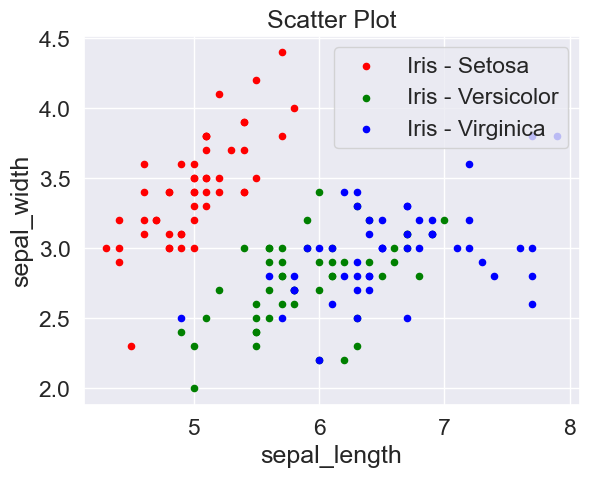

In [50]:
ax = df[df.species=='setosa'].plot.scatter(x='sepal_length', y='sepal_width', 
                                                    color='red', label='Iris - Setosa')
df[df.species=='versicolor'].plot.scatter(x='sepal_length', y='sepal_width', 
                                                color='green', label='Iris - Versicolor', ax=ax)
df[df.species=='virginica'].plot.scatter(x='sepal_length', y='sepal_width', 
                                                color='blue', label='Iris - Virginica', ax=ax)
ax.set_title("Scatter Plot")

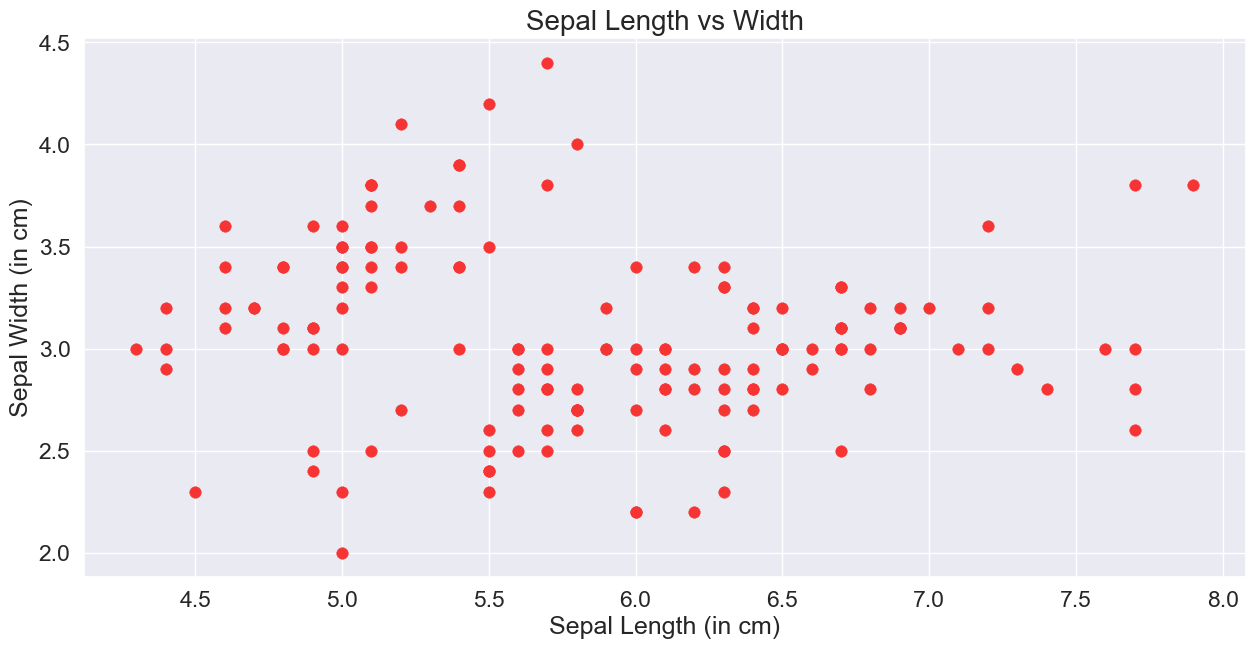

In [51]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(x=df['sepal_length'],y=df['sepal_width'], s=70, color='#f73434', edgecolor='#f73434', linewidth=0.3)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Sepal Length vs Width', fontsize = 20)
plt.show()

In [64]:
#  which uses Within Cluster Sum Of Squares (WCSS) against the the number of clusters (K Value) to figure out the optimal number of clusters value. WCSS measures sum of distances of observations from their cluster centroids which is given by the below formula.                              

from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km = KMeans(i)
    km.fit(clustering_data)
    wcss.append(km.inertia_)
np.array(wcss)

array([681.3706    , 152.34795176,  78.85566583,  57.35088021,
        49.97767846,  42.77032308,  34.59294048,  32.21882271,
        30.45609294,  27.30573593])

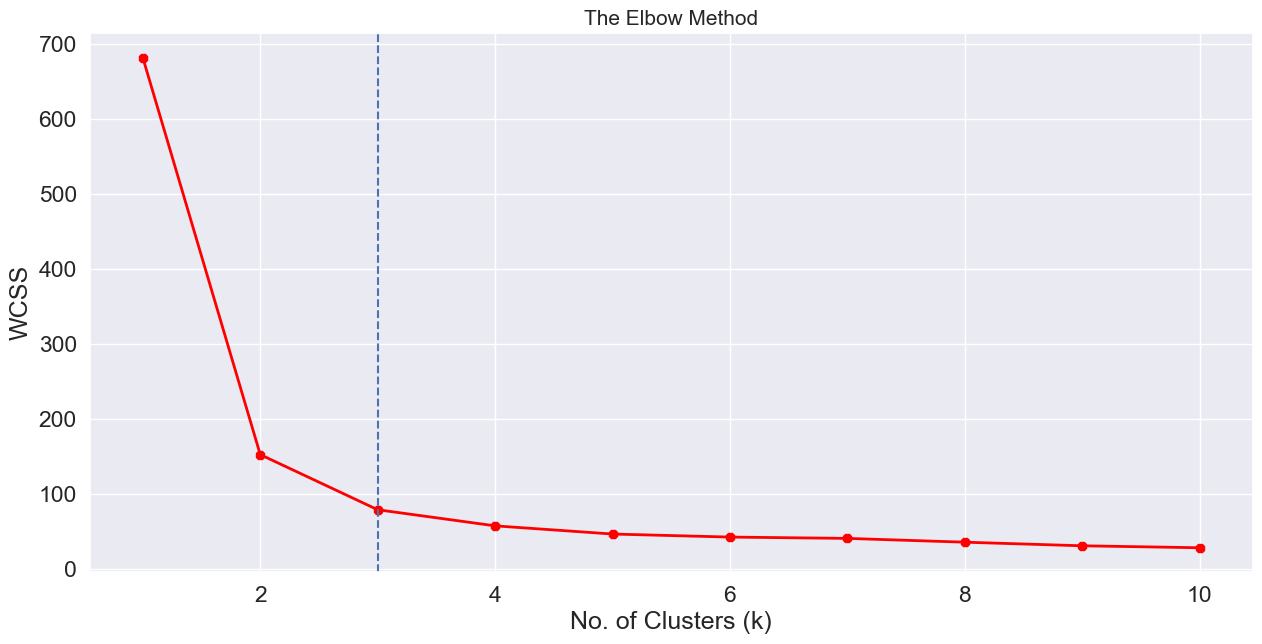

In [53]:
fig, ax = plt.subplots(figsize=(15,7))
ax = plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.axvline(x=3, ls='--')
plt.ylabel('WCSS')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize = 15)
plt.show()

Clustering

Now we will build the model for creating clusters from the dataset. We will use n_clusters = 3 i.e. 3 clusters as we have determined by the elbow method, which would be optimal for our dataset.

Our data set is for unsupervised learning therefore we will use fit_predict() Suppose we were working with supervised learning data set we would use fit_tranform()

In [54]:
from sklearn.cluster import KMeans

kms = KMeans(n_clusters=3, init='k-means++')
kms.fit(clustering_data)

KMeans(n_clusters=3)

Now that we have the clusters created, we will enter them into a different column

In [65]:
clusters = clustering_data.copy()
clusters['Cluster_Prediction'] = kms.fit_predict(clustering_data)
print(clusters[['Cluster_Prediction']].head())
clusters.head()

   Cluster_Prediction
0                   1
1                   1
2                   1
3                   1
4                   1


,sepal_length,sepal_width,petal_length,petal_width,Cluster_Prediction
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


We can also get the centroids of the clusters by the cluster_centers_ attribute of KMeans algorithm.

In [56]:
kms.cluster_centers_

array([[5.88360656, 2.74098361, 4.38852459, 1.43442623],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615]])

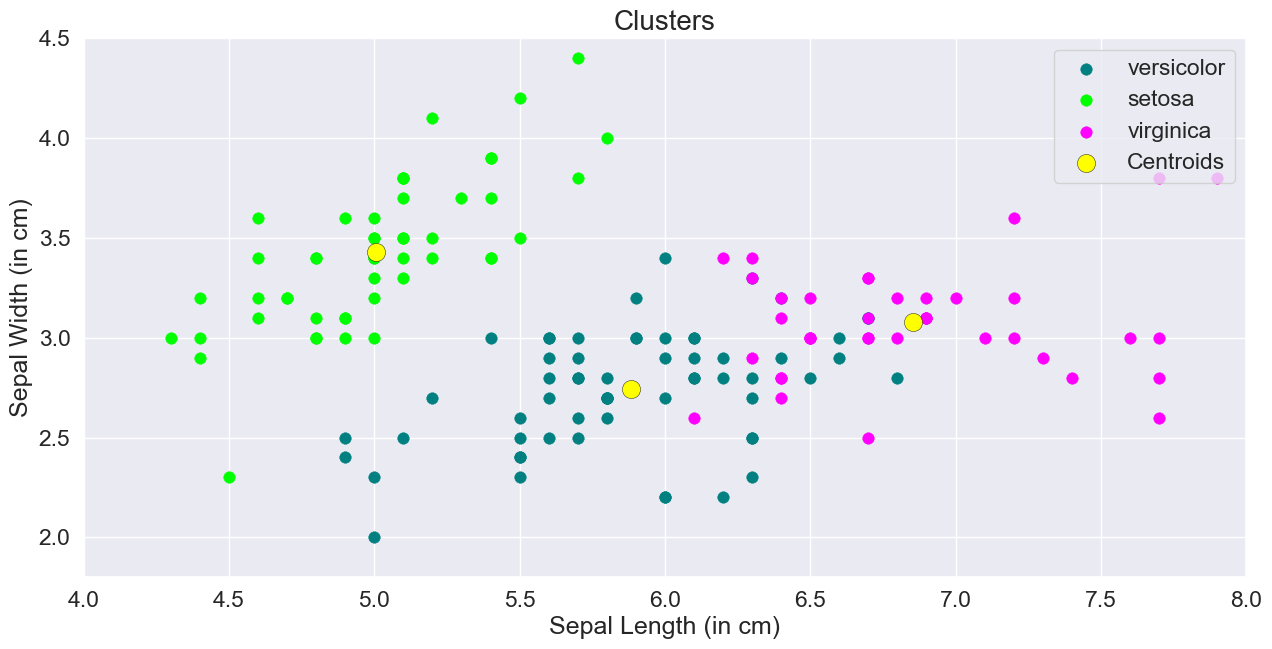

In [57]:
fig, ax = plt.subplots(figsize=(15,7)) 
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['sepal_length'],
            y=clusters[clusters['Cluster_Prediction'] == 0]['sepal_width'],
            s=70,edgecolor='teal', linewidth=0.3, c='teal', label='versicolor')


plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['sepal_length'],
            y=clusters[clusters['Cluster_Prediction'] == 1]['sepal_width'],
            s=70,edgecolor='lime', linewidth=0.3, c='lime', label='setosa')


plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 2]['sepal_length'],
            y=clusters[clusters['Cluster_Prediction'] == 2]['sepal_width'],
            s=70,edgecolor='magenta', linewidth=0.3, c='magenta', label='virginica')

plt.scatter(x=kms.cluster_centers_[:, 0], y=kms.cluster_centers_[:, 1], s = 170, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='upper right')
plt.xlim(4,8)
plt.ylim(1.8,4.5)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Clusters', fontsize = 20)
plt.show()

Analysis

1. Iris-versicolor

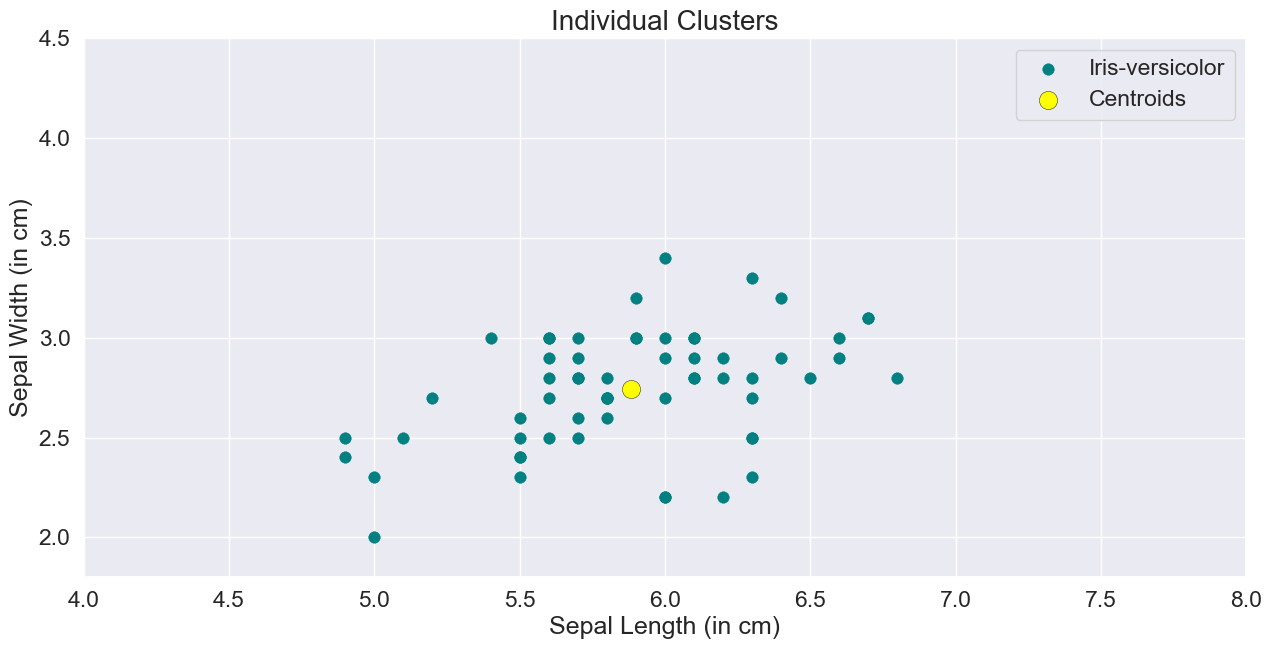

In [58]:
fig, ax = plt.subplots(figsize=(15,7)) 
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['sepal_length'],
            y=clusters[clusters['Cluster_Prediction'] == 0]['sepal_width'],
            s=70,edgecolor='teal', linewidth=0.3, c='teal', label='Iris-versicolor')


plt.scatter(x=kms.cluster_centers_[0, 0], y=kms.cluster_centers_[0, 1], s = 170, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='upper right')
plt.xlim(4,8)
plt.ylim(1.8,4.5)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Individual Clusters', fontsize = 20)
plt.show()

Iris-setosa

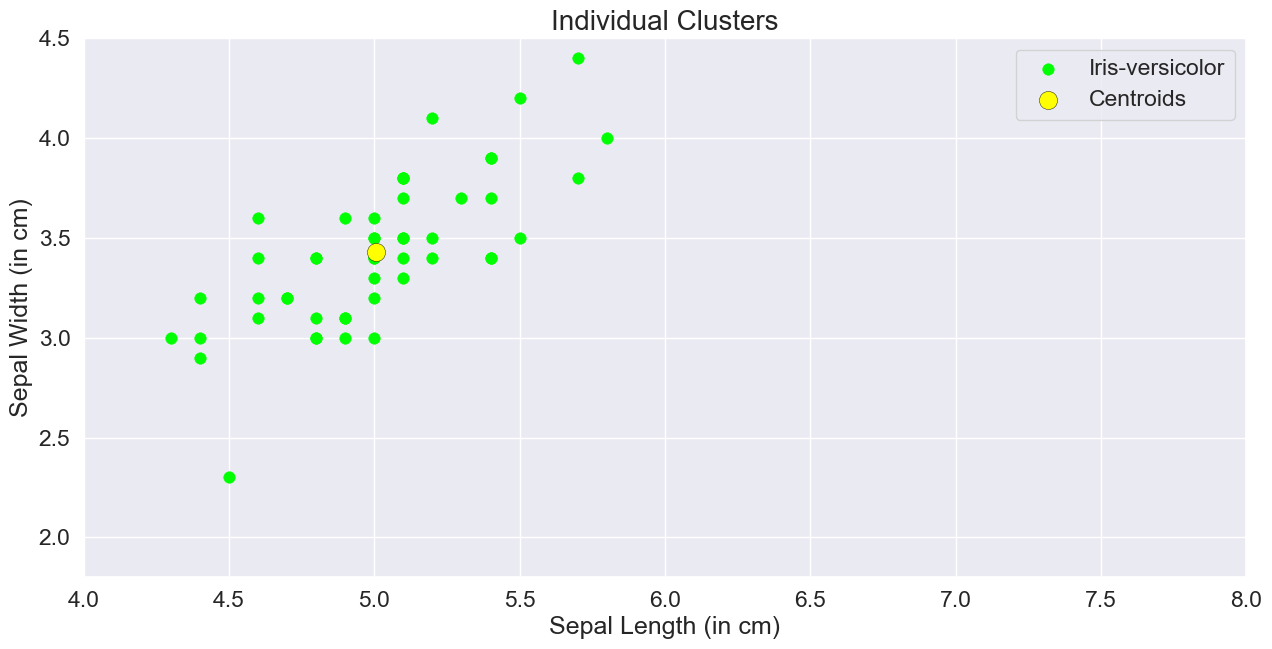

In [59]:
fig, ax = plt.subplots(figsize=(15,7)) 
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['sepal_length'],
            y=clusters[clusters['Cluster_Prediction'] == 1]['sepal_width'],
            s=70,edgecolor='lime', linewidth=0.3, c='lime', label='Iris-versicolor')


plt.scatter(x=kms.cluster_centers_[1, 0], y=kms.cluster_centers_[1, 1], s = 170, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='upper right')
plt.xlim(4,8)
plt.ylim(1.8,4.5)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Individual Clusters', fontsize = 20)
plt.show()

Iris-virginica

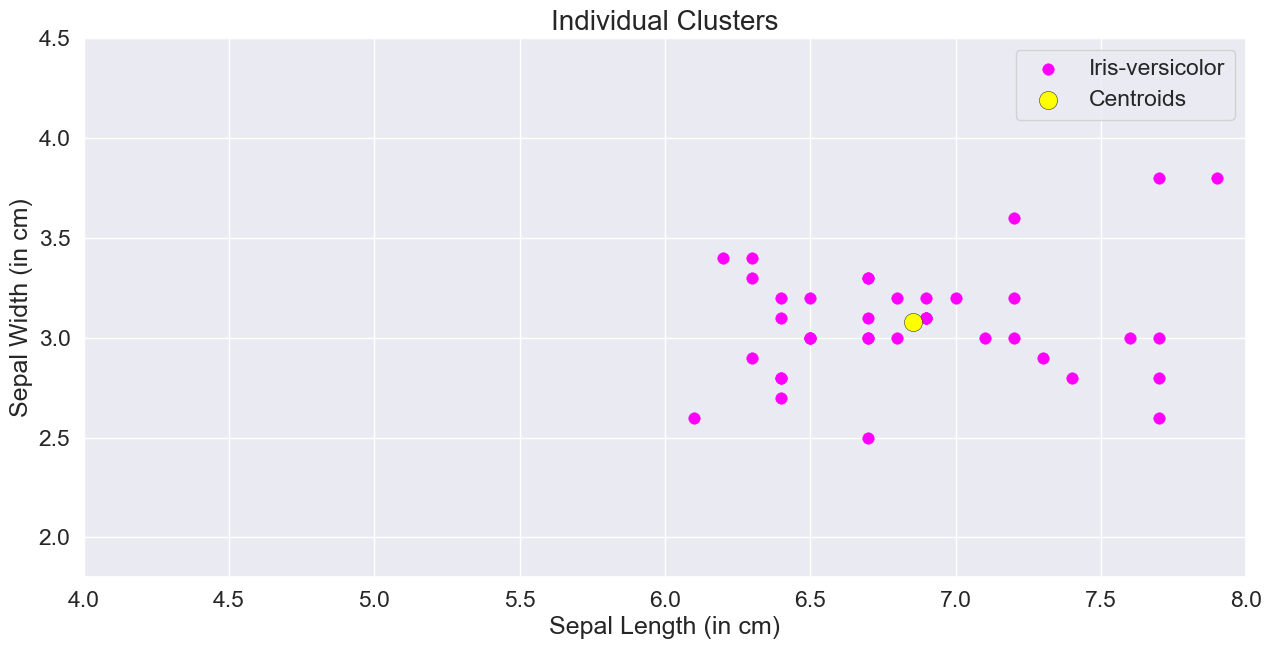

In [60]:
fig, ax = plt.subplots(figsize=(15,7)) 
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 2]['sepal_length'],
            y=clusters[clusters['Cluster_Prediction'] == 2]['sepal_width'],
            s=70,edgecolor='magenta', linewidth=0.3, c='magenta', label='Iris-versicolor')


plt.scatter(x=kms.cluster_centers_[2, 0], y=kms.cluster_centers_[2, 1], s = 170, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='upper right')
plt.xlim(4,8)
plt.ylim(1.8,4.5)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Individual Clusters', fontsize = 20)
plt.show()